dataset link =https://www.kaggle.com/eunjurho/german-traffic-sign-recognition-benchmark-cropped

In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
!pip install keras
from keras.utils import to_categorical
from PIL import Image 
import os
Path = os.path.join("C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed")
 



In [54]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [55]:
import os

cur_path = "C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed"



In [56]:
cur_path

'C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed'

In [57]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [58]:
data = np.array(data)
labels = np.array(labels)

In [59]:
#os.mkdir('training')

np.save('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/data.npy',data)
np.save('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/target.npy',labels)


In [60]:
#Loading for training
data=np.load('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/data.npy')
labels=np.load('C:/Users/satvi/Downloads/JPPY2135-Traffic Sign Board Recognition and Voice Alert/target.npy')
import numpy as np



In [61]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [64]:
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [65]:

import sys
print(sys.executable)


C:\Users\satvi\anaconda3\python.exe


In [66]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Train data shape: (31367, 30, 30, 3)
Test data shape: (7842, 30, 30, 3)
Train labels shape: (31367,)
Test labels shape: (7842,)


In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [68]:
from keras.utils import to_categorical


In [69]:
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [70]:
from tensorflow.keras.models import Sequential


In [71]:

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense


In [72]:

#1)Alexnet
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(30,30,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(44, activation='softmax')
])



In [73]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 160s 161ms/step - loss: 1.7101 - accuracy: 0.5069 - val_loss: 1.6722 - val_accuracy: 0.5904
Epoch 2/15
981/981 [==============================] - 177s 181ms/step - loss: 0.5351 - accuracy: 0.8520 - val_loss: 0.4961 - val_accuracy: 0.8600
Epoch 3/15
981/981 [==============================] - 206s 210ms/step - loss: 0.3222 - accuracy: 0.9154 - val_loss: 0.5256 - val_accuracy: 0.8735
Epoch 4/15
981/981 [==============================] - 226s 230ms/step - loss: 0.2817 - accuracy: 0.9330 - val_loss: 0.9677 - val_accuracy: 0.7512
Epoch 5/15
981/981 [==============================] - 196s 200ms/step - loss: 0.2213 - accuracy: 0.9473 - val_loss: 0.1651 - val_accuracy: 0.9592
Epoch 6/15
981/981 [==============================] - 216s 220ms/step - loss: 0.2070 - accuracy: 0.9516 - val_loss: 0.1841 - val_accuracy: 0.9547
Epoch 7/15
981/981 [==============================] - 205s 209ms/step - loss: 0.1899 - accuracy: 0.9560 - val_loss: 0.2308 -

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 5, 5, 96)          34944     
                                                                 
 batch_normalization_5 (Batc  (None, 5, 5, 96)         384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 256)         614656    
                                                                 
 batch_normalization_6 (Batc  (None, 3, 3, 256)        1024      
 hNormalization)                                                 
                                                      

In [78]:
import pickle

pickle_location = 'C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed.pickle'
with open(pickle_location, 'wb') as file_pi:
     pickle.dump(history, file_pi, protocol=pickle.HIGHEST_PROTOCOL)
print("History saved to file: %s" % pickle_location)

filepath = 'traffic1.h5'
model.save('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed')

filepath = 'weights1.h5'
model.save_weights('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed')
model.save('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed/traffic1.h5')


INFO:tensorflow:Assets written to: ram://f2179b95-8c06-488a-9a65-eb1836fe59f2/assets


INFO:tensorflow:Assets written to: ram://f2179b95-8c06-488a-9a65-eb1836fe59f2/assets


History saved to file: C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed.pickle


INFO:tensorflow:Assets written to: C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed\assets


INFO:tensorflow:Assets written to: C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed\assets


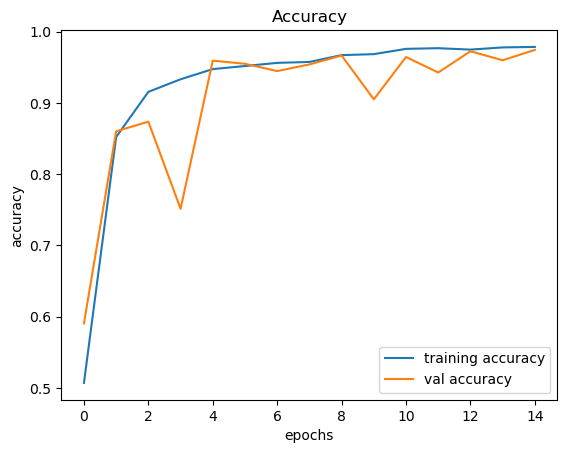

In [79]:
 #accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

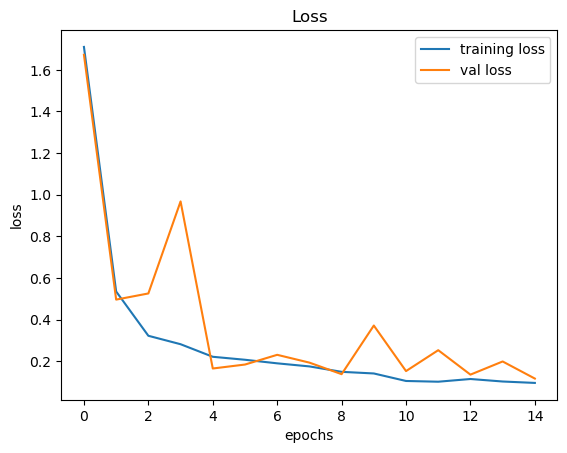

In [80]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [90]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix

# Assuming you have your AlexNet model stored in the 'model' variable
# Assuming you have your test data stored in the 'X_test' variable
# Assuming you have your true labels for the test data stored in the 'y_test' variable

# Make predictions on the test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.round(y_pred_probs)

# Convert the predicted probabilities to binary labels

# Calculate precision
precision = precision_score(y_test, y_pred_classes, average='micro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_classes, average='micro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='micro')
print("F1 score", f1)



246/246 [==============================] - 6s 23ms/step
Precision: 0.982415309025084
Recall: 0.9688854883958173
F1 score 0.9756034925526451


In [81]:
import numpy as np

In [82]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons',
            43: 'No sign'}

In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pyttsx3
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

1/1 [==============================] - 0s 238ms/step
Predicted traffic sign is:  Speed limit (100km/h)


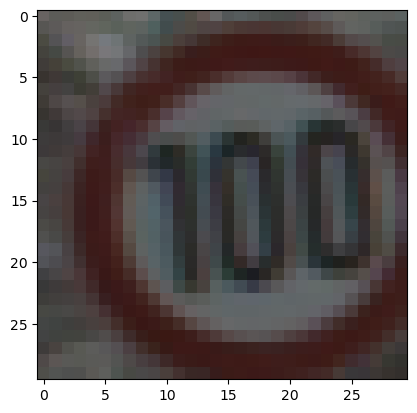

In [84]:
plot,prediction = test_on_img('C:/Users/satvi/Downloads/archive (4)/gtsrb-preprocessed/train/7/00007_00047_00027.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()
engine = pyttsx3.init()
engine.say(classes[a])
engine.runAndWait()